In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random

In [3]:
df = pd.read_csv("homeprices_banglore.csv")
df.head(5)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [7]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X, scaled_y


(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ],
        [0.12758621, 0.25      ],
        [0.6662069 , 0.75      ],
        [0.86206897, 0.75      ],
        [0.17586207, 0.5       ],
        [1.        , 1.        ],
        [0.34482759, 0.5       ],
        [0.68448276, 0.75      ],
        [0.06896552, 0.25      ],
        [0.10344828, 0.25      ],
        [0.5       , 0.5       ],
        [0.12931034, 0.25      ],
        [0.13103448, 0.5       ],
        [0.25517241, 0.5       ],
        [0.67931034, 0.5       ],
        [0.        , 0.        ]]),
 array([[0.05237037],
        [0.65185185],
        [0.22222222],
        [0.31851852],
        [0.14074074],
        [0.04444444],
        [0.76296296],
        [0.91111111],
        [0.13333333],
        [1.        ],
        [0.37037037],
        [0.8       ],
        [0.04444444],
        [0.05925926],
        [0

In [10]:
scaled_y_copy = scaled_y.copy()

In [12]:
scaled_y_copy = scaled_y_copy.flatten()
scaled_y_copy

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [13]:
scaled_y = scaled_y.flatten()
scaled_y

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [37]:
def batch_gd(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]   # feature area and bedroom
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]     # no. of rows/ data saples
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b
        
        #derivatives
        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)

        #parameter updation
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        #error- mse
        cost = np.mean(np.square(y_true - y_predicted))

        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [38]:
w, b, cost, cost_list, epoch_list = batch_gd(scaled_X, scaled_y, 1000)


In [39]:
w , b, cost

(array([0.66469087, 0.60541671]),
 np.float64(-0.17792104056392882),
 np.float64(0.0048654808183488454))

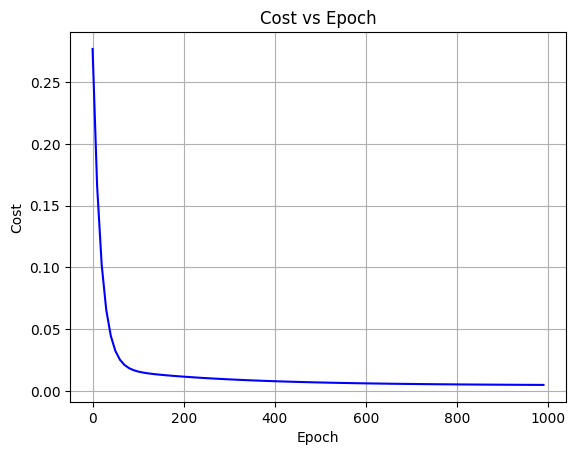

In [41]:
plt.plot(epoch_list, cost_list, linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch')
plt.grid(True)
plt.show()

In [61]:
def predict(area, bedroom, w, b):
    scaled_X = sx.transform([[area,bedroom]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b

    return sy.inverse_transform([[scaled_price]])[0][0]

In [62]:
price_batch = predict(1056, 2, w, b)
price_batch

e:\padhai ka saman\python\Deep learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(36.33475491614511)

In [51]:
def stochastic_gd(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b
        
        #derivatives
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y - y_predicted)

        #parameter updation
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        #error- mse
        cost = np.mean(np.square(sample_y - y_predicted))

        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [52]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gd(scaled_X, scaled_y,10000)


In [53]:
w_sgd, b_sgd, cost_sgd

(array([0.70498803, 0.67475612]),
 np.float64(-0.23450572989380236),
 np.float64(0.0005969307301198565))

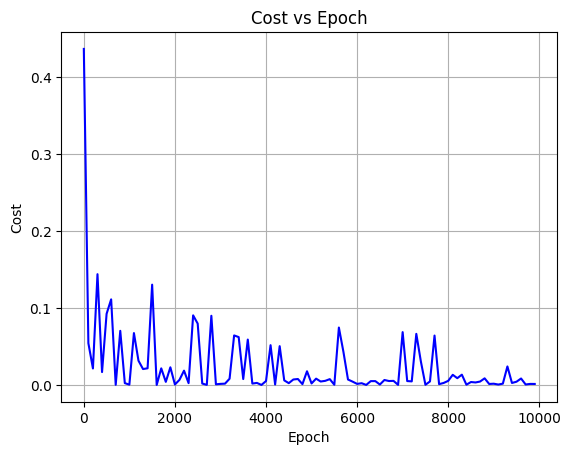

In [54]:
plt.plot(epoch_list_sgd, cost_list_sgd, linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch')
plt.grid(True)
plt.show()

In [63]:
price_sgd = predict(1054, 2, w_sgd, b_sgd)
price_sgd

e:\padhai ka saman\python\Deep learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(31.450621124943254)

In [57]:
def mini_bgd(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1] 
    
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    if batch_size > total_samples: 
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [58]:
w_mini, b_mini, cost_mini, cost_list_mini, epoch_list_mini = mini_bgd(
    scaled_X, scaled_y, epochs=120, batch_size=5
)

In [59]:
w_mini, b_mini, cost_mini

(array([0.70995498, 0.67795597]),
 np.float64(-0.23351599320242838),
 np.float64(0.0016886804631610797))

In [64]:
price_mini = predict(1054,2, w_mini, b_mini)
price_mini

e:\padhai ka saman\python\Deep learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(31.75096057633856)

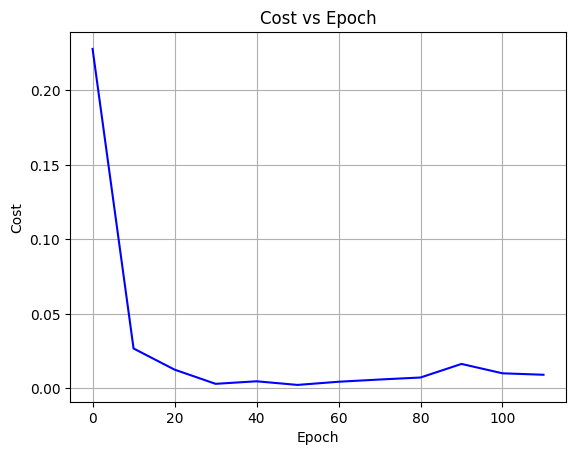

In [60]:
plt.plot(epoch_list_mini, cost_list_mini, linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch')
plt.grid(True)
plt.show()